What all do I need?

In [26]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [27]:
df = pd.read_csv("/Users/r3alistic/Programming/MLProficiency/HandsOnMLBook/caffeine_intake_tracker.csv")
df.head()

,caffeine_mg,age,focus_level,sleep_quality,sleep_impacted,beverage_coffee,beverage_energy_drink,beverage_tea,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,gender_female,gender_male
0,0.454545,1.000000,0.715384,0.749790,1,True,False,False,False,True,False,True,False
1,0.286364,0.833333,0.846471,0.730060,0,True,False,False,False,False,True,True,False
2,0.531818,0.476190,0.665639,0.276600,1,False,True,False,False,False,True,False,True
3,0.068182,0.642857,0.751364,0.654003,0,False,False,True,False,False,True,True,False
4,0.409091,0.047619,0.808104,0.709735,1,True,False,False,False,True,False,False,True


In [28]:
df.isna().sum()

caffeine_mg              0
age                      0
focus_level              0
sleep_quality            0
sleep_impacted           0
beverage_coffee          0
beverage_energy_drink    0
beverage_tea             0
time_of_day_afternoon    0
time_of_day_evening      0
time_of_day_morning      0
gender_female            0
gender_male              0
dtype: int64

In [29]:
df.describe()

,caffeine_mg,age,focus_level,sleep_quality,sleep_impacted
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.349464,0.504048,0.825575,0.600212,0.406000
std,0.223971,0.297397,0.167635,0.233145,0.491576
min,0.000000,0.000000,0.216512,0.000000,0.000000
25%,0.177273,0.261905,0.711317,0.414782,0.000000
50%,0.290909,0.500000,0.850635,0.644141,0.000000
75%,0.518182,0.761905,1.000000,0.781867,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.dtypes

caffeine_mg              float64
age                      float64
focus_level              float64
sleep_quality            float64
sleep_impacted             int64
beverage_coffee             bool
beverage_energy_drink       bool
beverage_tea                bool
time_of_day_afternoon       bool
time_of_day_evening         bool
time_of_day_morning         bool
gender_female               bool
gender_male                 bool
dtype: object

We do not need to do onehot encoding for boolean features

So what all steps were done for us?

- Filling in missing values 
- OneHot Encoding

How does our data move?

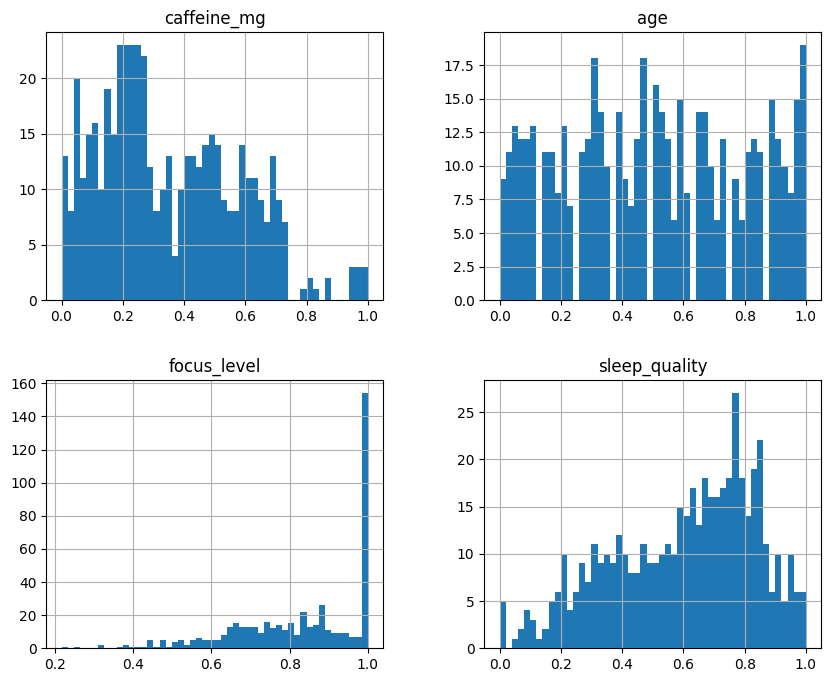

In [31]:
df[["caffeine_mg","age","focus_level","sleep_quality"]].hist(bins=50,figsize=(10,8))
plt.show()

Pretty nice distributions off the bat. Here we can see that most people thing that they have great focus. Sleep quality is a tad bit left skewed. 

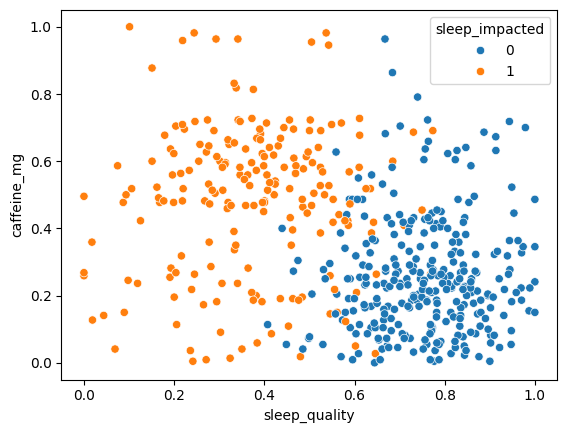

In [32]:
sns.scatterplot(data=df,x="sleep_quality",y="caffeine_mg",hue="sleep_impacted",legend="auto")
plt.show()

Do we need to stratify? Let's look at the categories

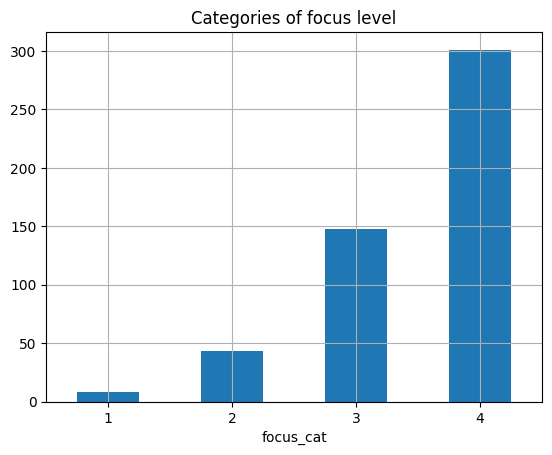

In [33]:
df["focus_cat"] = pd.cut(df["focus_level"],bins=[0.0,0.4,0.6,0.8,1],labels=["1","2","3","4"])

focus_cat = df["focus_cat"].value_counts().sort_index()
focus_cat.plot(kind="bar",grid=True,rot=0)
plt.title("Categories of focus level")
plt.show()

Wouldn't hurt to stratify. I myself fall in categories 1 and 2 most of the time. But now no need for that column

I don't think I will log transform anything. Let's get to scaling }

<Axes: >

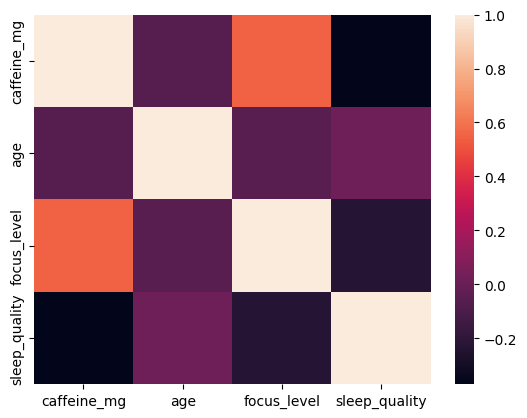

In [34]:
corr_matrix = df[["caffeine_mg","age","focus_level","sleep_quality"]].corr(numeric_only=True)
sns.heatmap(corr_matrix)

To my utmost surprise, age has a low correlation. But focus_level shows positive correlation. We can infer that those who self-proclaim greater focus due to caffeine will want to consume more, thinking it will increase their focus. As for sleep quality, very strong almost perfect negative correlation. Those who sleep less drink more caffeine. 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X= df.drop(columns=["caffeine_mg"])
y = df["caffeine_mg"].to_numpy() #better if you do this

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=df["focus_cat"],random_state=42)

No need for focus cat any more

In [38]:
df.drop(columns=["focus_cat"],inplace=True)

Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:
df.head()

,caffeine_mg,age,focus_level,sleep_quality,sleep_impacted,beverage_coffee,beverage_energy_drink,beverage_tea,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,gender_female,gender_male
0,0.454545,1.000000,0.715384,0.749790,1,True,False,False,False,True,False,True,False
1,0.286364,0.833333,0.846471,0.730060,0,True,False,False,False,False,True,True,False
2,0.531818,0.476190,0.665639,0.276600,1,False,True,False,False,False,True,False,True
3,0.068182,0.642857,0.751364,0.654003,0,False,False,True,False,False,True,True,False
4,0.409091,0.047619,0.808104,0.709735,1,True,False,False,False,True,False,False,True


In [41]:
numCols = ["age","focus_level","sleep_quality"] 
preprocessing = ColumnTransformer([
    ("quantitative",StandardScaler(),numCols)
], remainder="passthrough")

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linReg = Pipeline([
    ("preprocessing",preprocessing),
    ("regression",LinearRegression())
])
linReg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantitative',
                                                  StandardScaler(),
                                                  ['age', 'focus_level',
                                                   'sleep_quality'])])),
                ('regression', LinearRegression())])

In [44]:
caffeine_pred = linReg.predict(X_train)

Accuracy score and r2 score are not the same. One is just the proportion of correct predictions and the other is the Correlation of Determination, which is the proportion of variability in the target that can be explained by the linear model

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

Don't touch the test data yet 

In [46]:
print("Train RMSE:",root_mean_squared_error(y_train,caffeine_pred))
print("Train MAE:",mean_absolute_error(y_train,caffeine_pred))
print("Train R^2:",r2_score(y_train,caffeine_pred))

Train RMSE: 0.1193762043862669
Train MAE: 0.09456220226488737
Train R^2: 0.6984634764001842


Most likely we are severeley underfitting the model. We can either remove certain predictors, choose a more complex model, or fine tune. 

First let's try diff regressors

In [47]:
from sklearn.svm import SVR

In [48]:
svr = Pipeline([
    ("preprocessing",preprocessing),
    ("regression",SVR())
])
svr.fit(X_train,y_train)

y_pred_train_svr = svr.predict(X_train)

print("Train RMSE:",root_mean_squared_error(y_pred_train_svr,caffeine_pred))
print("Train MAE:",mean_absolute_error(y_pred_train_svr,caffeine_pred))
print("Train R^2:",r2_score(y_pred_train_svr,caffeine_pred))

Train RMSE: 0.04749867381066118
Train MAE: 0.036730825167122685
Train R^2: 0.9323096732248888


Wait that is significantly better. Let's see if we can make it even better now. 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = [{
    "regression__C":[0.1,1.0,10,100,1000], #larger C = less regularization
    "regression__gamma":[0.0001,0.001,0.01,0.1,1], # how far each training point influences in RBF
    "regression__epsilon":[0.01,0.1,0.5] #"epsilon-tube" with -- how much error allowed before penalty
}]

#n_jobs is about CPU cores. It's how many of those param_grid combos to run and evaluate at the same time. 
# -1 is the fastest. But the higher it goes, the more RAM it takes up

#negative RMSE is just -1 * RMSE but helps with consistency. Higher the better
grid = GridSearchCV(svr,param_grid,cv=5,scoring="neg_root_mean_squared_error")

grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('quantitative',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'focus_level',
                                                                          'sleep_quality'])])),
                                       ('regression', SVR())]),
             param_grid=[{'regression__C': [0.1, 1.0, 10, 100, 1000],
                          'regression__epsilon': [0.01, 0.1, 0.5],
                          'regression__gamma': [0.0001, 0.001, 0.01, 0.1, 1]}],
             scoring='neg_root_mean_squared_error')

In [51]:
grid.best_score_

np.float64(-0.11961356247045377)

In [52]:
final_model = grid.best_estimator_
final_pred = final_model.predict(X_test)

In [53]:
print("Test RMSE:",root_mean_squared_error(y_test,final_pred))
print("Test MAE:",mean_absolute_error(y_test,final_pred))
print("Test R^2:",r2_score(y_test,final_pred))

Test RMSE: 0.14544345015890536
Test MAE: 0.11271229211448214
Test R^2: 0.637518862022169


Maybe make a kurtotis checker